# Hodgkin Huxley Model - Clamp Voltages
The goal is to visualize the Na and K ion gates for different Clamp Volateges $V_m$

In [1]:
import sys
from tqdm import tqdm_notebook
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Constants

In [20]:
# ion conductivities
G_Na_max = 120
G_K_max = 36

V_rest = -65 # Resting voltage

# Nernst voltages
E_K = V_rest - 12
E_Na = V_rest + 115

In [10]:
def calc_gates(V_m):
    if V_m == -55:
        alpha_n = 1
    else:
        alpha_n =0.01 * (-(V_m + 55)/(np.exp(-(V_m + 55)/10)-1))
    beta_n = 0.125 * np.exp(-(V_m + 65)/80)
    
    if V_m == -40:
        alpha_m = 1
    else:
        alpha_m = 0.1 * (- (V_m + 40) / (np.exp(-(V_m + 40)/10)-1))
    beta_m = 4 * np.exp(-(V_m + 65)/18)
    alpha_h = 0.07 * np.exp(-(V_m + 65)/20)
    beta_h = 1/(np.exp(-(V_m + 35)/10)+1)
    return alpha_n, beta_n, alpha_m, beta_m, alpha_h, beta_h

## SImulation Properties

In [4]:
delta_t = 0.001
t_end = 10
timesteps = np.arange(0,t_end, delta_t)

clamp_voltages = np.arange(-100, 40, 10)

n_voltages = len(clamp_voltages)
n_timesteps = len(timesteps)

# initial values
n0 = 0.317711
m0 = 0.0529347
h0 = 0.596385

In [5]:
# variables
alpha_n = np.zeros((n_voltages, n_timesteps))
beta_n = np.zeros((n_voltages, n_timesteps))
alpha_m = np.zeros((n_voltages, n_timesteps))
beta_m = np.zeros((n_voltages, n_timesteps))
alpha_h = np.zeros((n_voltages, n_timesteps))
beta_h = np.zeros((n_voltages, n_timesteps))

n = np.zeros((n_voltages, n_timesteps))
n_dot = np.zeros((n_voltages, n_timesteps))
m = np.zeros((n_voltages, n_timesteps))
m_dot = np.zeros((n_voltages, n_timesteps))
h = np.zeros((n_voltages, n_timesteps))
h_dot = np.zeros((n_voltages, n_timesteps))

I_K = np.zeros((n_voltages, n_timesteps))
I_Na = np.zeros((n_voltages, n_timesteps))

## Simulation

In [15]:
for v_index,v in enumerate(tqdm_notebook(clamp_voltages)):
    n[v_index, 0] = n0
    m[v_index, 0] = m0
    h[v_index, 0] = h0
    for t_index,t in enumerate(timesteps):        
        if t > 0.3 and t < 7.3:
            V_m = v
        else:
            V_m = V_rest
    
        alpha_n[v_index,t_index], beta_n[v_index,t_index], alpha_m[v_index,t_index], beta_m[v_index,t_index], alpha_h[v_index,t_index], beta_h[v_index,t_index] = calc_gates(V_m)
                    
        n_dot[v_index,t_index] = alpha_n[v_index,t_index] * (1 - n[v_index,t_index]) - beta_n[v_index,t_index] * n[v_index,t_index]
        m_dot[v_index,t_index] = alpha_m[v_index,t_index] * (1 - m[v_index,t_index]) - beta_m[v_index,t_index] * m[v_index,t_index]
        h_dot[v_index,t_index] = alpha_h[v_index,t_index] * (1 - h[v_index,t_index]) - beta_h[v_index,t_index] * h[v_index,t_index]
        
        if t_index < n_timesteps-1:
            n[v_index,t_index+1] = n[v_index,t_index] + n_dot[v_index,t_index] * delta_t
            m[v_index,t_index+1] = m[v_index,t_index] + m_dot[v_index,t_index] * delta_t
            h[v_index,t_index+1] = h[v_index,t_index] + h_dot[v_index,t_index] * delta_t
        
        I_K[v_index,t_index] = (V_m-E_K) * G_K_max * n[v_index,t_index]**4
        
        I_Na[v_index,t_index] = (V_m-E_Na) * G_Na_max * m[v_index,t_index]**3 * h[v_index,t_index]

## Plot Results

Kalium (Potassium):


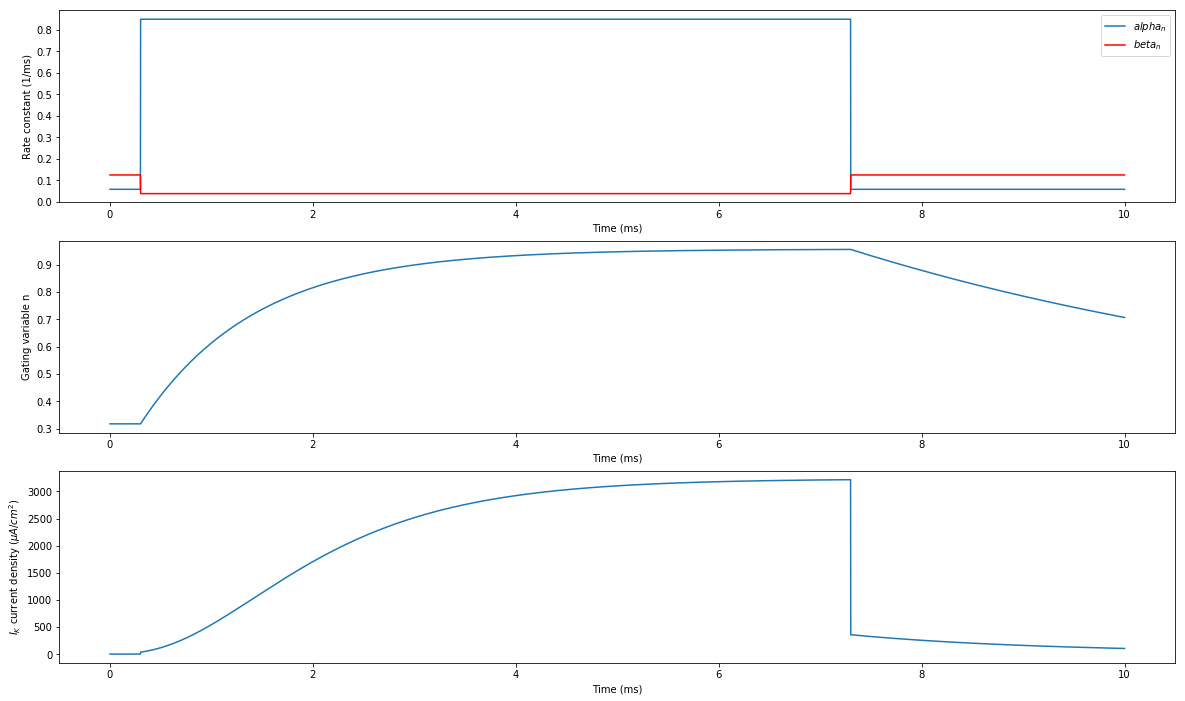

Natrium (Sodium):


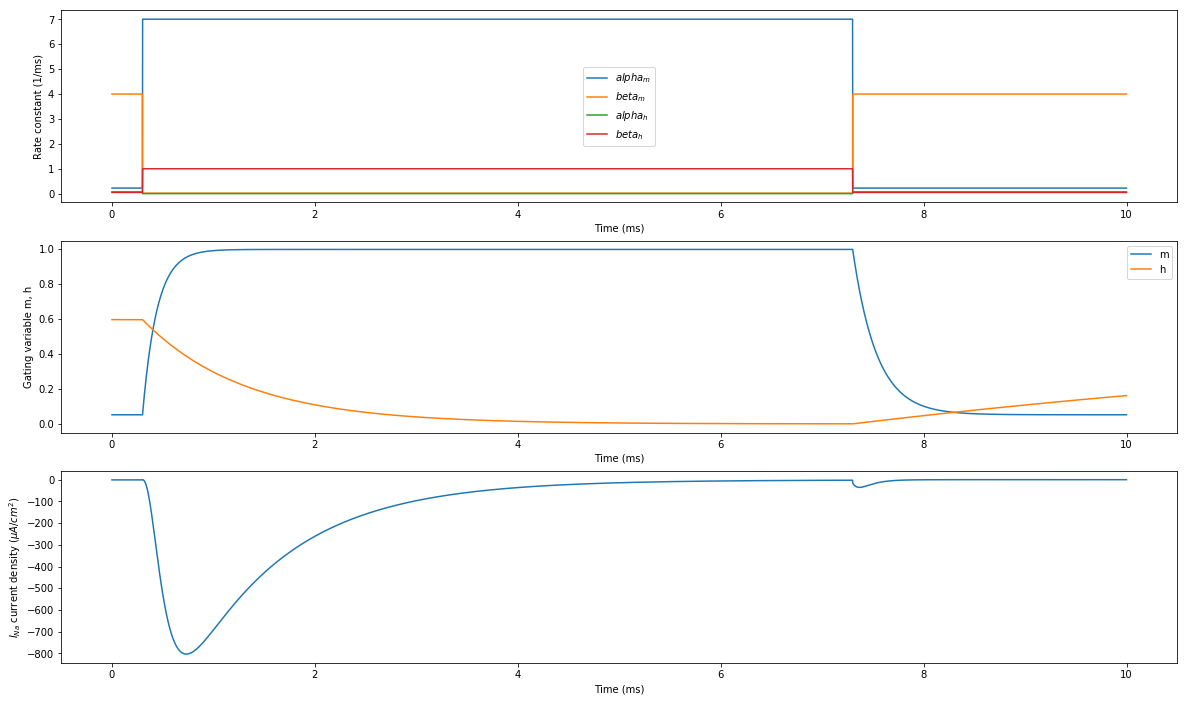

In [23]:
# Kalium
print('Kalium (Potassium):')
plt.figure(figsize=(20, 12))
plt.subplot(3,1,1)
plt.plot(timesteps,alpha_n[13,:])
plt.plot(timesteps,beta_n[13,:],'r')
plt.legend(['$alpha_n$','$beta_n$'])
plt.xlabel('Time (ms)')
plt.ylabel('Rate constant (1/ms)')

plt.subplot(3,1,2)
plt.plot(timesteps, n[13,:])
plt.xlabel('Time (ms)')
plt.ylabel('Gating variable n')

plt.subplot(3,1,3)
plt.plot(timesteps,I_K[13,:])
plt.xlabel('Time (ms)')
plt.ylabel('$I_{K}$ current density ($\mu A/cm^2$)')
plt.show()

# Natrium
print('Natrium (Sodium):')
plt.figure(figsize=(20, 12))
plt.subplot(3,1,1)
plt.plot(timesteps,alpha_m[13,:])
plt.plot(timesteps,beta_m[13,:])
plt.plot(timesteps,alpha_h[13,:])
plt.plot(timesteps,beta_h[13,:])
plt.legend(['$alpha_m$','$beta_m$','$alpha_h$','$beta_h$'])
plt.xlabel('Time (ms)')
plt.ylabel('Rate constant (1/ms)')

plt.subplot(3,1,2)
plt.plot(timesteps, m[13,:])
plt.plot(timesteps, h[13,:])
plt.legend(['m','h'])
plt.xlabel('Time (ms)')
plt.ylabel('Gating variable m, h')

plt.subplot(3,1,3)
plt.plot(timesteps,I_Na[13,:])
plt.xlabel('Time (ms)')
plt.ylabel('$I_{Na}$ current density ($\mu A/cm^2$)')
plt.show()